# Get Data

- Get data from Material project by using API

In [40]:
# import libraries needed
from mp_api.client import MPRester
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
api_key = '************'

In [3]:
with MPRester(api_key) as mpr:
    available_fields = mpr.materials.available_fields
    summary_available_fields = mpr.materials.summary.available_fields

In [4]:
available_fields

['builder_meta',
 'nsites',
 'elements',
 'nelements',
 'composition',
 'composition_reduced',
 'formula_pretty',
 'formula_anonymous',
 'chemsys',
 'volume',
 'density',
 'density_atomic',
 'symmetry',
 'material_id',
 'structure',
 'deprecated',
 'deprecation_reasons',
 'initial_structures',
 'task_ids',
 'deprecated_tasks',
 'calc_types',
 'last_updated',
 'created_at',
 'origins',
 'warnings',
 'task_types',
 'run_types',
 'entries']

In [5]:
summary_available_fields

['builder_meta',
 'nsites',
 'elements',
 'nelements',
 'composition',
 'composition_reduced',
 'formula_pretty',
 'formula_anonymous',
 'chemsys',
 'volume',
 'density',
 'density_atomic',
 'symmetry',
 'property_name',
 'material_id',
 'deprecated',
 'deprecation_reasons',
 'last_updated',
 'origins',
 'warnings',
 'structure',
 'task_ids',
 'uncorrected_energy_per_atom',
 'energy_per_atom',
 'formation_energy_per_atom',
 'energy_above_hull',
 'is_stable',
 'equilibrium_reaction_energy_per_atom',
 'decomposes_to',
 'xas',
 'grain_boundaries',
 'band_gap',
 'cbm',
 'vbm',
 'efermi',
 'is_gap_direct',
 'is_metal',
 'es_source_calc_id',
 'bandstructure',
 'dos',
 'dos_energy_up',
 'dos_energy_down',
 'is_magnetic',
 'ordering',
 'total_magnetization',
 'total_magnetization_normalized_vol',
 'total_magnetization_normalized_formula_units',
 'num_magnetic_sites',
 'num_unique_magnetic_sites',
 'types_of_magnetic_species',
 'bulk_modulus',
 'shear_modulus',
 'universal_anisotropy',
 'homoge

#### The property we focuse:
- e_total
- e_ionic
- e_electronic

In [6]:
with MPRester(api_key) as mpr:
    dielectric_doc = mpr.dielectric.search(material_ids=["mp-7000"])

C:\Users\Fortyfour\AppData\Local\Temp\ipykernel_9140\320519980.py:2: DeprecationWarning: Accessing dielectric data through MPRester.dielectric is deprecated. Please use MPRester.materials.dielectric instead.
  dielectric_doc = mpr.dielectric.search(material_ids=["mp-7000"])


Retrieving DielectricDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
dielectric_doc

[MPDataDoc<DielectricDoc>(
 builder_meta=EmmetMeta(emmet_version='0.63.1', pymatgen_version='2023.7.17', pull_request=990, database_version='2023.11.1', build_date=datetime.datetime(2023, 8, 9, 6, 53, 5, 672000), license=None),
 nsites=9,
 elements=[Element O, Element Si],
 nelements=2,
 composition=Composition('Si3 O6'),
 composition_reduced=Composition('Si1 O2'),
 formula_pretty='SiO2',
 formula_anonymous='AB2',
 chemsys='O-Si',
 volume=120.33570465702554,
 density=2.487349728586711,
 density_atomic=13.370633850780616,
 symmetry=SymmetryData(crystal_system=<CrystalSystem.trig: 'Trigonal'>, symbol='P3_121', number=152, point_group='32', symprec=0.1, version='1.16.5'),
 property_name='dielectric',
 material_id=MPID(mp-7000),
 deprecated=False,
 deprecation_reasons=None,
 last_updated=datetime.datetime(2023, 3, 11, 14, 56, 30, 545000),
 origins=[PropertyOrigin(name='dielectric', task_id=MPID(mp-1119669), last_updated=datetime.datetime(2019, 3, 27, 18, 24, 34, 132000))],
 warnings=[],
 t

#### 各向异性的晶体的不同方向介电常数也不同
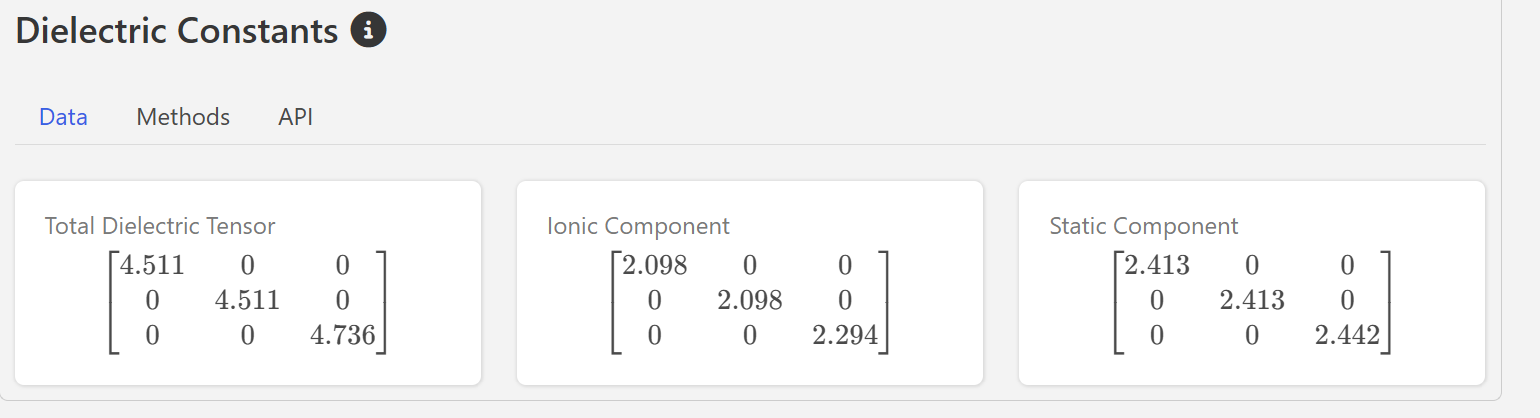
- 上面API返回的数据是其平均值

#### 介电常数受温度影响大吗？
- 取向极化受温度影响大

#### The features which needed:
- 原子类型 --- composition
- 晶体结构 --- symmetry=SymmetryData(crystal_system=<CrystalSystem.trig: 'Trigonal'>, symbol='P3_121', number=152, point_group='32', symprec=0.1, version='1.16.5'),
- 能带 --- band_gap
- 单位体积原子数量，单位体积离子对数量（不存在离子极化则设置为0）
  - 密度 --- density + density_atomic
- 电子极化率$\alpha_e$
  - 电子云半径$r_0$ --- 'MagpieData minimum CovalentRadius', 'MagpieData maximum CovalentRadius', 'MagpieData range CovalentRadius','MagpieData mean CovalentRadius',
  - 电子个数Z --- 'MagpieData minimum Number', 'MagpieData maximum Number', 'MagpieData range Number', 'MagpieData mean Number',
  - 电子云振动频率$\omega_0$
  - 共价晶体共价电子数目
    - 共价键强度 --- 'MagpieData minimum Electronegativity', 'MagpieData maximum Electronegativity', 'MagpieData range Electronegativity', 'MagpieData mean Electronegativity',
- 偶极定向极化率：
  - 固有偶极矩$p_0$
  - **温度？**

In [8]:
data = dielectric_doc[0]

In [9]:
# 构建pandas DataFrame
columns_name = ['material_id', 'composition', 'crystal_system', 'point_group', 'band_gap', 'density', 'density_atomic', 
                'formation_energy_per_atom', 'e_total', 'e_ionic', 'e_electronic']
data_df = pd.DataFrame([], columns=columns_name)

In [10]:
str(data.density)

'2.487349728586711'

In [11]:
test_data = {
    'material_id': data.material_id,
    'formula_pretty': [data.formula_pretty],
    'crystal_system': data.symmetry.crystal_system,
    'point_group': data.symmetry.point_group,
    'band_gap': 0,
    'density': data.density,
    'density_atomic': data.density_atomic,
    'formation_energy_per_atom': 0,
    'e_total': data.e_total,
    'e_ionic': data.e_ionic,
    'e_electronic': data.e_electronic
}
data_df = pd.DataFrame(test_data)

In [12]:
data_df

,material_id,formula_pretty,crystal_system,point_group,band_gap,density,density_atomic,formation_energy_per_atom,e_total,e_ionic,e_electronic
0,mp-7000,SiO2,Trigonal,32,0,2.48735,13.370634,0,4.586132,2.16345,2.422682


In [13]:
# 得到组分
from matminer.featurizers.conversions import StrToComposition
str_comp = StrToComposition(target_col_id='composition')
data_composition_df = str_comp.featurize_dataframe(data_df, col_id='formula_pretty')

StrToComposition:   0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
data_composition_df

,material_id,formula_pretty,crystal_system,point_group,band_gap,density,density_atomic,formation_energy_per_atom,e_total,e_ionic,e_electronic,composition
0,mp-7000,SiO2,Trigonal,32,0,2.48735,13.370634,0,4.586132,2.16345,2.422682,"(Si, O)"


In [15]:
# 特征化
from matminer.featurizers.composition import ElementProperty
featurizer = ElementProperty.from_preset('magpie') 	# 从预设数据库中提取特征
data_featurized = featurizer.featurize_dataframe(data_composition_df, col_id='composition')

ElementProperty:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
pd.set_option('display.max_columns', 150)
data_featurized

,material_id,formula_pretty,crystal_system,point_group,band_gap,density,density_atomic,formation_energy_per_atom,e_total,e_ionic,e_electronic,composition,MagpieData minimum Number,MagpieData maximum Number,MagpieData range Number,MagpieData mean Number,MagpieData avg_dev Number,MagpieData mode Number,MagpieData minimum MendeleevNumber,MagpieData maximum MendeleevNumber,MagpieData range MendeleevNumber,MagpieData mean MendeleevNumber,MagpieData avg_dev MendeleevNumber,MagpieData mode MendeleevNumber,MagpieData minimum AtomicWeight,MagpieData maximum AtomicWeight,MagpieData range AtomicWeight,MagpieData mean AtomicWeight,MagpieData avg_dev AtomicWeight,MagpieData mode AtomicWeight,MagpieData minimum MeltingT,MagpieData maximum MeltingT,MagpieData range MeltingT,MagpieData mean MeltingT,MagpieData avg_dev MeltingT,MagpieData mode MeltingT,MagpieData minimum Column,MagpieData maximum Column,MagpieData range Column,MagpieData mean Column,MagpieData avg_dev Column,MagpieData mode Column,MagpieData minimum Row,MagpieData maximum Row,MagpieData range Row,MagpieData mean Row,MagpieData avg_dev Row,MagpieData mode Row,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData range CovalentRadius,MagpieData mean CovalentRadius,MagpieData avg_dev CovalentRadius,MagpieData mode CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,MagpieData avg_dev Electronegativity,MagpieData mode Electronegativity,MagpieData minimum NsValence,MagpieData maximum NsValence,MagpieData range NsValence,MagpieData mean NsValence,MagpieData avg_dev NsValence,MagpieData mode NsValence,MagpieData minimum NpValence,MagpieData maximum NpValence,MagpieData range NpValence,MagpieData mean NpValence,MagpieData avg_dev NpValence,MagpieData mode NpValence,MagpieData minimum NdValence,MagpieData maximum NdValence,MagpieData range NdValence,MagpieData mean NdValence,MagpieData avg_dev NdValence,MagpieData mode NdValence,MagpieData minimum NfValence,MagpieData maximum NfValence,MagpieData range NfValence,MagpieData mean NfValence,MagpieData avg_dev NfValence,MagpieData mode NfValence,MagpieData minimum NValence,MagpieData maximum NValence,MagpieData range NValence,MagpieData mean NValence,MagpieData avg_dev NValence,MagpieData mode NValence,MagpieData minimum NsUnfilled,MagpieData maximum NsUnfilled,MagpieData range NsUnfilled,MagpieData mean NsUnfilled,MagpieData avg_dev NsUnfilled,MagpieData mode NsUnfilled,MagpieData minimum NpUnfilled,MagpieData maximum NpUnfilled,MagpieData range NpUnfilled,MagpieData mean NpUnfilled,MagpieData avg_dev NpUnfilled,MagpieData mode NpUnfilled,MagpieData minimum NdUnfilled,MagpieData maximum NdUnfilled,MagpieData range NdUnfilled,MagpieData mean NdUnfilled,MagpieData avg_dev NdUnfilled,MagpieData mode NdUnfilled,MagpieData minimum NfUnfilled,MagpieData maximum NfUnfilled,MagpieData range NfUnfilled,MagpieData mean NfUnfilled,MagpieData avg_dev NfUnfilled,MagpieData mode NfUnfilled,MagpieData minimum NUnfilled,MagpieData maximum NUnfilled,MagpieData range NUnfilled,MagpieData mean NUnfilled,MagpieData avg_dev NUnfilled,MagpieData mode NUnfilled,MagpieData minimum GSvolume_pa,MagpieData maximum GSvolume_pa,MagpieData range GSvolume_pa,MagpieData mean GSvolume_pa,MagpieData avg_dev GSvolume_pa,MagpieData mode GSvolume_pa,MagpieData minimum GSbandgap,MagpieData maximum GSbandgap,MagpieData range GSbandgap,MagpieData mean GSbandgap,MagpieData avg_dev GSbandgap,MagpieData mode GSbandgap,MagpieData minimum GSmagmom,MagpieData maximum GSmagmom,MagpieData range GSmagmom,MagpieData mean GSmagmom,MagpieData avg_dev GSmagmom,MagpieData mode GSmagmom,MagpieData minimum SpaceGroupNumber,MagpieData maximum SpaceGroupNumber,MagpieData range SpaceGroupNumber,MagpieData mean SpaceGroupNumber,MagpieData avg_dev SpaceGroupNumber,MagpieData mode SpaceGroupNumber
0,mp-7000,SiO2,Trigonal,32,0,2.48735,13.370634,0,4.586132,2.16345,2.422682

In [17]:
columns_name += ['MagpieData minimum Number', 'MagpieData maximum Number', 'MagpieData range Number', 'MagpieData mean Number',
                 'MagpieData minimum CovalentRadius', 'MagpieData maximum CovalentRadius', 'MagpieData range CovalentRadius', 'MagpieData mean CovalentRadius',
                 'MagpieData minimum Electronegativity', 'MagpieData maximum Electronegativity', 'MagpieData range Electronegativity', 'MagpieData mean Electronegativity'
                 ]
columns_name

['material_id',
 'composition',
 'crystal_system',
 'point_group',
 'band_gap',
 'density',
 'density_atomic',
 'formation_energy_per_atom',
 'e_total',
 'e_ionic',
 'e_electronic',
 'MagpieData minimum Number',
 'MagpieData maximum Number',
 'MagpieData range Number',
 'MagpieData mean Number',
 'MagpieData minimum CovalentRadius',
 'MagpieData maximum CovalentRadius',
 'MagpieData range CovalentRadius',
 'MagpieData mean CovalentRadius',
 'MagpieData minimum Electronegativity',
 'MagpieData maximum Electronegativity',
 'MagpieData range Electronegativity',
 'MagpieData mean Electronegativity']

In [19]:
len(columns_name)

23

### 构建Material Project 上所有材料的上述属性dataframe

In [25]:
from emmet.core.summary import HasProps

with MPRester(api_key) as mpr:
    fields = ["material_id", 'formula_pretty', 'symmetry', 'band_gap', 'density', 'density_atomic', 'formation_energy_per_atom', 'e_total', 'e_ionic', 'e_electronic']
    docs = mpr.materials.summary.search(
        has_props = [HasProps.dielectric], fields=fields
    )

Retrieving SummaryDoc documents:   0%|          | 0/7277 [00:00<?, ?it/s]

In [26]:
docs[0]

MPDataDoc<SummaryDoc>(
formula_pretty='Ba(PdS2)2',
density=5.022717317257348,
density_atomic=22.595814571374152,
symmetry=SymmetryData(crystal_system=<CrystalSystem.mono: 'Monoclinic'>, symbol='P2_1/m', number=11, point_group='2/m', symprec=0.1, version='2.0.2'),
material_id=MPID(mp-28967),
formation_energy_per_atom=-1.1240792407142866,
band_gap=0.7791999999999999,
e_total=17.04833398,
e_ionic=7.118969296666667,
e_electronic=9.929364683333334,
fields_not_requested=['builder_meta', 'nsites', 'elements', 'nelements', 'composition', 'composition_reduced', 'formula_anonymous', 'chemsys', 'volume', 'property_name', 'deprecated', 'deprecation_reasons', 'last_updated', 'origins', 'warnings', 'structure', 'task_ids', 'uncorrected_energy_per_atom', 'energy_per_atom', 'energy_above_hull', 'is_stable', 'equilibrium_reaction_energy_per_atom', 'decomposes_to', 'xas', 'grain_boundaries', 'cbm', 'vbm', 'efermi', 'is_gap_direct', 'is_metal', 'es_source_calc_id', 'bandstructure', 'dos', 'dos_energy_up'

In [32]:
# 构建pandas DataFrame
# total_data_df = pd.DataFrame([], columns=columns_name)
doc_data_dict = {
    'material_id': [doc.material_id for doc in docs],
    'formula_pretty': [doc.formula_pretty for doc in docs],
    'crystal_system': [doc.symmetry.crystal_system for doc in docs],
    'space_group': [doc.symmetry.number for doc in docs],
    'band_gap': [doc.band_gap for doc in docs],
    'density': [doc.density for doc in docs],
    'density_atomic': [doc.density_atomic for doc in docs],
    'formation_energy_per_atom': [doc.formation_energy_per_atom for doc in docs],
    'e_total': [doc.e_total for doc in docs],
    'e_ionic': [doc.e_ionic for doc in docs],
    'e_electronic': [doc.e_electronic for doc in docs]
    }


In [33]:
total_data_df = pd.DataFrame(doc_data_dict)

In [34]:
total_data_df

,material_id,formula_pretty,crystal_system,space_group,band_gap,density,density_atomic,formation_energy_per_atom,e_total,e_ionic,e_electronic
0,mp-28967,Ba(PdS2)2,Monoclinic,11,0.7792,5.022717,22.595815,-1.124079,17.048334,7.118969,9.929365
1,mp-766094,NbO2F,Orthorhombic,19,2.8980,3.764366,15.869706,-3.099174,17.572010,13.469477,4.102533
2,mp-36577,Sr(AsS2)2,Triclinic,1,1.7212,3.094976,28.031499,-0.766100,18.488667,12.443616,6.045051
3,mp-1102092,NaFe(SO4)2,Monoclinic,12,2.0944,2.901260,12.923684,-1.948264,9.596025,6.499905,3.096120
4,mp-720391,BH4NF4,Orthorhombic,62,7.4812,1.860992,9.355010,-1.970766,6.216546,4.350314,1.866232
...,...,...,...,...,...,...,...,...,...,...,...
7272,mp-8922,Cd(SbO3)2,Trigonal,162,1.4136,6.486808,12.854175,-1.591694,11.288411,7.044083,4.244328
7273,mp-554108,LiRe(OF2)2,Tetragonal,113,3.1439,4.712755,13.263352,-2.613382,8.323904,5.748856,2.575047
7274,mp-8610,Li8PtO6,Trigonal,148,2.1611,4.594223,8.351892,-1.912238,10.707209,6.673766,4.033443
7275,mp-570158,KRb3CdCl6,Trigonal,167,3.9323,2.868582,32.660467,-2.067717,7.076649,4.519887,2.556762


#### 探索性数据分析EDA

In [37]:
total_data_df.isna().any()  # 可见每一列都不含NaN

material_id                  False
formula_pretty               False
crystal_system               False
space_group                  False
band_gap                     False
density                      False
density_atomic               False
formation_energy_per_atom    False
e_total                      False
e_ionic                      False
e_electronic                 False
dtype: bool

In [38]:
total_data_df.describe()

,space_group,band_gap,density,density_atomic,formation_energy_per_atom,e_total,e_ionic,e_electronic
count,7277.000000,7277.000000,7277.000000,7277.000000,7277.000000,7277.000000,7277.000000,7277.000000
mean,97.351931,2.328964,4.402645,18.866027,-1.702746,50.967904,32.435320,18.532584
std,76.170554,1.691062,1.858210,8.591112,0.982772,1656.585187,1489.248036,626.217070
min,1.000000,0.000000,0.023670,5.643294,-4.509148,1.155248,0.000000,-64.837332
25%,19.000000,1.003500,3.085919,12.585297,-2.481756,7.930701,4.000432,2.941051
50%,82.000000,1.974600,4.136236,15.917620,-1.648019,11.655871,6.467976,4.263057
75%,164.000000,3.409200,5.348088,23.646638,-0.883874,18.958478,11.352121,6.548818
max,230.000000,9.335400,17.732855,132.548261,4.688205,126575.316823,126567.273642,46857.910510


In [39]:
total_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7277 entries, 0 to 7276
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   material_id                7277 non-null   object 
 1   formula_pretty             7277 non-null   object 
 2   crystal_system             7277 non-null   object 
 3   space_group                7277 non-null   int64  
 4   band_gap                   7277 non-null   float64
 5   density                    7277 non-null   float64
 6   density_atomic             7277 non-null   float64
 7   formation_energy_per_atom  7277 non-null   float64
 8   e_total                    7277 non-null   float64
 9   e_ionic                    7277 non-null   float64
 10  e_electronic               7277 non-null   float64
dtypes: float64(7), int64(1), object(3)
memory usage: 625.5+ KB


In [42]:
# 保存为csv
total_data_df.to_csv('./data/total_data.csv', index=False)

### 使用根据物理领域知识推断的特征与根据组分生成的特征分别训练模型，比较其准确性

- [ ] 将需要的特征名字加入到columns_name中